<a href="https://colab.research.google.com/github/Easwar25/eash/blob/main/Error_Log_Classification_model_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
#Math library: Array etc

import pandas as pd
#Library for data analysis 

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import jaccard_score, f1_score, log_loss, precision_score, accuracy_score, recall_score

import seaborn as sns
#library for math graphs

import matplotlib.pyplot as plt
%matplotlib inline

print("Libraries Imported.")

Libraries Imported.


In [ ]:
#load the csv file into a new pandas dataframe
ticket_df = pd.read_csv('Train Data1.csv', header=0)
print(ticket_df.shape)
ticket_df.head()

(1470, 2)


,Issues,Categories
0,"Unable to process Row No ""1"". Received Mfr. Se...",Validation Error
1,User does not have the permission to Perform t...,Validation Error
2,"Contract # ""SCNT48034"" Revision # ""0"" cannot b...",Validation Error
3,"Unable to process Material Request. Serial # ""...",Validation Error
4,The State Code entered already exists for the ...,Validation Error


In [ ]:
ticket_df['Categories'].value_counts()

Validation Error    1309
Database Error        55
Scripting Error       51
Others                23
Product error         13
Deployment Error      10
Server Error           7
Framework error        2
Name: Categories, dtype: int64

In [ ]:
classifier = 'Categories'
classifier_labels = list(ticket_df[classifier].value_counts().index)
classifier_labels

['Validation Error',
 'Database Error',
 'Scripting Error',
 'Others',
 'Product error',
 'Deployment Error',
 'Server Error',
 'Framework error']

In [ ]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from spacy.lang.en import English
import string
from collections import Counter
import spacy
import re

In [ ]:
#Factorisation of categories 
ticket_df['ticket_type_id'] = ticket_df['Categories'].factorize()[0]
ticket_df.head()

,Issues,Categories,ticket_type_id
0,"Unable to process Row No ""1"". Received Mfr. Se...",Validation Error,0
1,User does not have the permission to Perform t...,Validation Error,0
2,"Contract # ""SCNT48034"" Revision # ""0"" cannot b...",Validation Error,0
3,"Unable to process Material Request. Serial # ""...",Validation Error,0
4,The State Code entered already exists for the ...,Validation Error,0


In [ ]:
ticket_type_id_df = ticket_df[['Categories', 'ticket_type_id']].drop_duplicates().sort_values('ticket_type_id')
ticket_type_to_id = dict(ticket_type_id_df.values)
id_to_ticket_type = dict(ticket_type_id_df[['ticket_type_id', 'Categories']].values)
ticket_type_id_df

,Categories,ticket_type_id
0,Validation Error,0
5,Others,1
13,Database Error,2
18,Product error,3
30,Scripting Error,4
42,Framework error,5
66,Deployment Error,6
198,Server Error,7


In [ ]:
ticket_type_to_id

{'Database Error': 2,
 'Deployment Error': 6,
 'Framework error': 5,
 'Others': 1,
 'Product error': 3,
 'Scripting Error': 4,
 'Server Error': 7,
 'Validation Error': 0}

In [ ]:
id_to_ticket_type

{0: 'Validation Error',
 1: 'Others',
 2: 'Database Error',
 3: 'Product error',
 4: 'Scripting Error',
 5: 'Framework error',
 6: 'Deployment Error',
 7: 'Server Error'}

In [ ]:
X = ticket_df['Issues'].values
y = ticket_df['Categories'].values

In [ ]:
print(y)

['Validation Error' 'Validation Error' 'Validation Error' ...
 'Scripting Error' 'Validation Error' 'Product error']


In [34]:
#Feature Vectorisation (not needed)
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(X)
labels = ticket_df['ticket_type_id']
features.shape

In [45]:
#Feature Vectorisation 
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', ngram_range=(1, 2), stop_words='english')
X_counts = tfidf.fit_transform(X)
# tfidf_transformer = TfidfTransformer()
# X_tfidf = tfidf_transformer.fit_transform(X_counts)
X_counts.shape 

(1470, 776)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_counts, y, test_size = 0.3, shuffle=True, stratify=y, random_state = 42)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1029, 776) (1029,)
Test set: (441, 776) (441,)


In [58]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

model_dict = {
              'Dummy': DummyClassifier(random_state=3),
              'K Nearest Neighbor': KNeighborsClassifier(),
              'Logistic Regression': OneVsRestClassifier(LogisticRegression()),
              'Multinomial Naive Bayes': MultinomialNB(),
              'Linear Support Vector Classifier': LinearSVC(),
              'Random Forest': RandomForestClassifier(random_state=3),
              'Decision Tree': DecisionTreeClassifier(random_state=3),
              'AdaBoost': AdaBoostClassifier(random_state=3),
              'Stochastic Gradient Descent': SGDClassifier(random_state=3, loss='log'),
             }

model_dict

{'AdaBoost': AdaBoostClassifier(random_state=3),
 'Decision Tree': DecisionTreeClassifier(random_state=3),
 'Dummy': DummyClassifier(random_state=3),
 'K Nearest Neighbor': KNeighborsClassifier(),
 'Linear Support Vector Classifier': LinearSVC(),
 'Logistic Regression': OneVsRestClassifier(estimator=LogisticRegression()),
 'Multinomial Naive Bayes': MultinomialNB(),
 'Random Forest': RandomForestClassifier(random_state=3),
 'Stochastic Gradient Descent': SGDClassifier(loss='log', random_state=3)}

In [59]:
def execute_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Accuracy   : ", accuracy_score(y_test, y_pred))
    print("Precision  : ", precision_score(y_test, y_pred, average='macro'))
    print("Recall     : ", recall_score(y_test, y_pred, average='macro'))
    print("F1         : ", f1_score(y_test, y_pred, average='macro'))

    labels = ["Validation Error", "Database Error", "Others", "Scripting Error", "Framework error", "Deployment Error", "Server Error"]


    matrix = confusion_matrix(y_test, y_pred, labels = labels)
    fig, ax = plt.subplots(figsize=(10,10))
    ax = sns.heatmap(matrix, annot=True, fmt='d', cmap = "Blues", xticklabels=labels, yticklabels=labels)
    ax.set_title("Confusion Matrix", fontsize=18)
    ax.set_xlabel("Predicted", fontsize=14)
    ax.set_ylabel("Actual", fontsize=14)

Dummy: 

Accuracy   :  0.891156462585034
Precision  :  0.11139455782312925
Recall     :  0.125
F1         :  0.11780575539568346


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


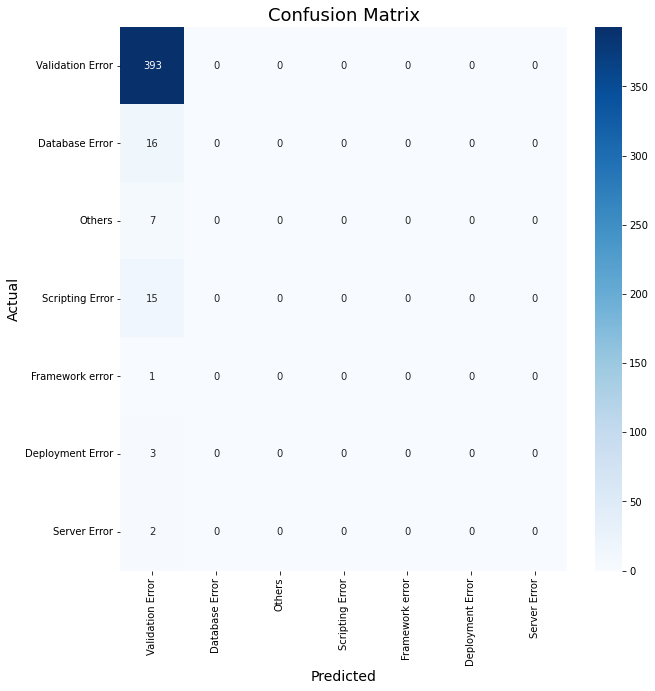

In [60]:
print('Dummy: \n')
model = DummyClassifier(random_state=3)
execute_model(model)

K Nearest Neighbor: 

Accuracy   :  0.8934240362811792
Precision  :  0.5962722388315731
Recall     :  0.6010700654307525
F1         :  0.5576880001386416


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


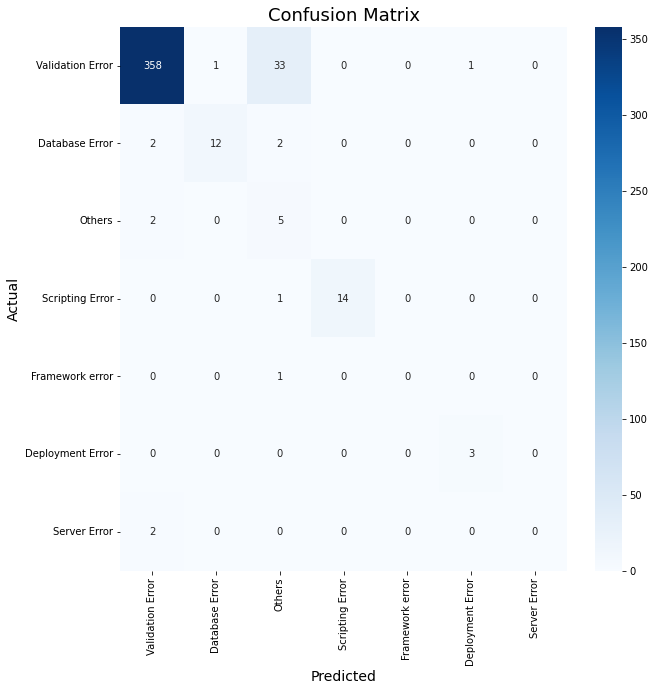

In [61]:
print('K Nearest Neighbor: \n')
model = KNeighborsClassifier()
execute_model(model)

Logistic Regression: 

Accuracy   :  0.891156462585034
Precision  :  0.11139455782312925
Recall     :  0.125
F1         :  0.11780575539568346


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


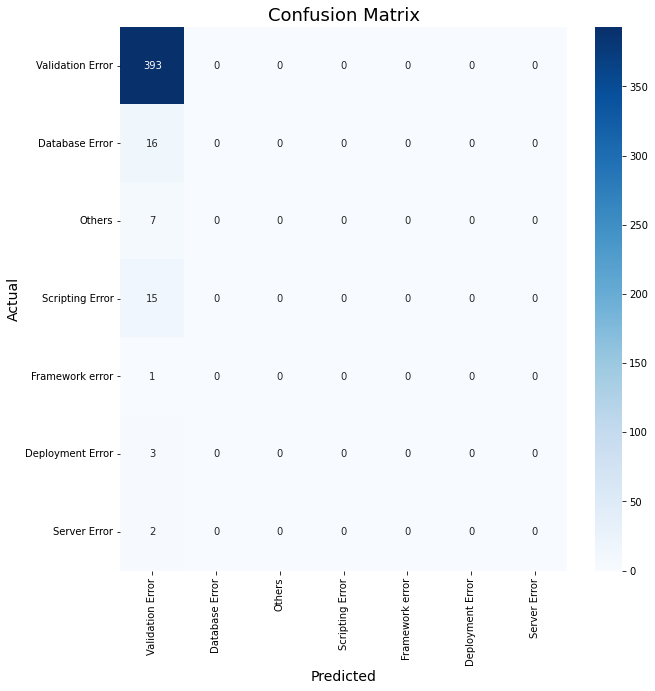

In [62]:
print('Logistic Regression: \n')
model = OneVsRestClassifier(LogisticRegression(C=0.01, solver='liblinear'))
execute_model(model)

Multinomial Naive Bayes: 

Accuracy   :  0.9501133786848073
Precision  :  0.5468018903237881
Recall     :  0.4133519629225736
F1         :  0.4611389889632298


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


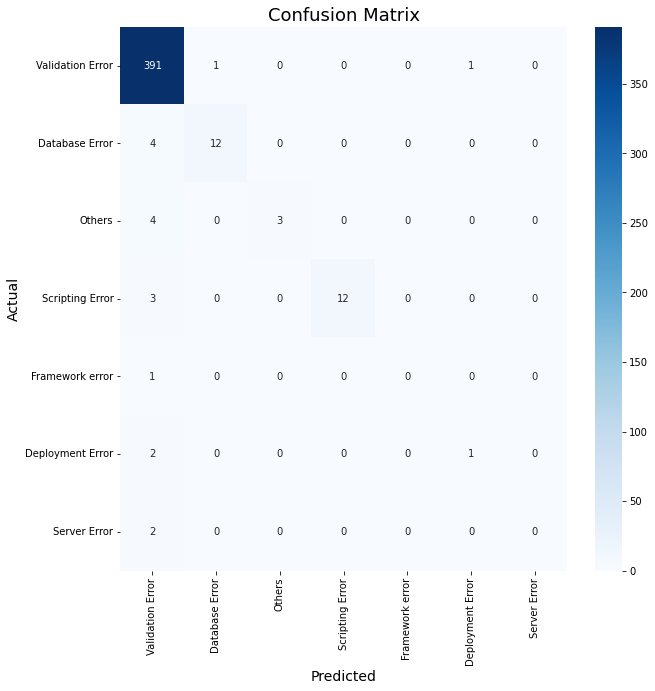

In [63]:
print('Multinomial Naive Bayes: \n')
model = MultinomialNB()
execute_model(model)

Linear Suuport Vector Classifier: 

Accuracy   :  0.9727891156462585
Precision  :  0.685
Recall     :  0.6330896719374772
F1         :  0.6561757537732665


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


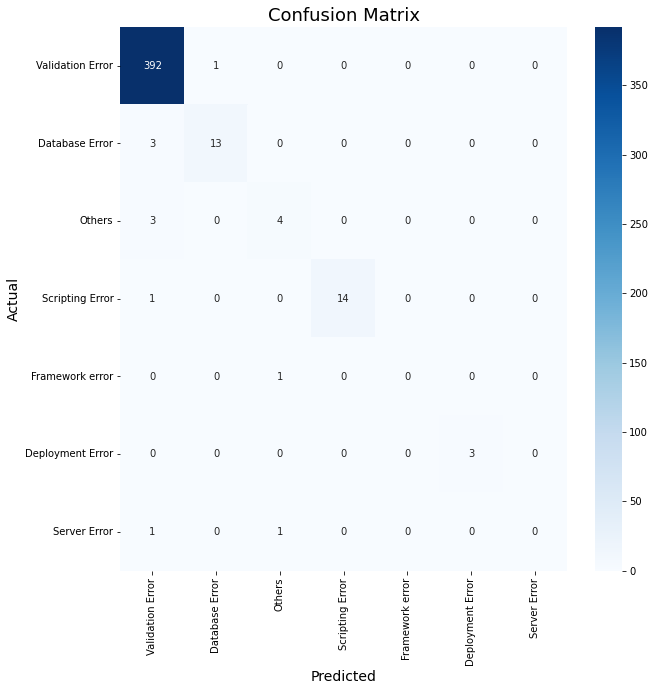

In [64]:
print('Linear Suuport Vector Classifier: \n')
model = LinearSVC()
execute_model(model)

Random Forest: 

Accuracy   :  0.9682539682539683
Precision  :  0.6876595179014533
Recall     :  0.5735658624136677
F1         :  0.6217814235380514


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


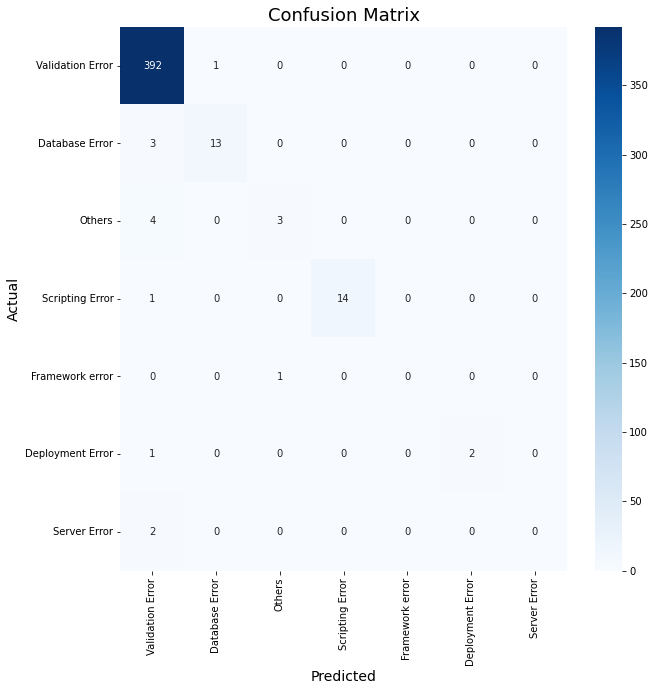

In [65]:
print('Random Forest: \n')
model = RandomForestClassifier(random_state=3)
execute_model(model)

Decision Tree: 

Accuracy   :  0.9659863945578231
Precision  :  0.7069815805109922
Recall     :  0.6767783306070521
F1         :  0.6810107770327221


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


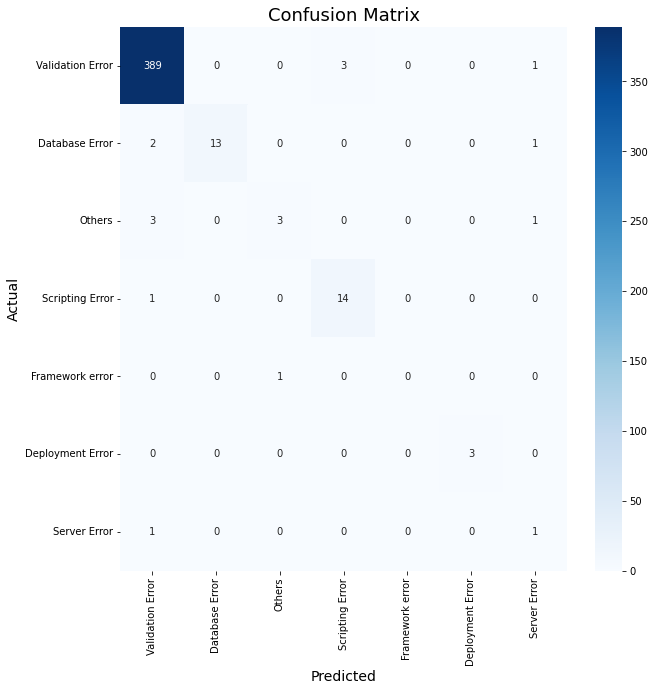

In [66]:
print('Decision Tree: \n')
model = DecisionTreeClassifier(random_state=3)
execute_model(model)

In [67]:
model = LinearSVC(random_state=0, tol=1e-05)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy   : ", accuracy_score(y_test, y_pred))
print("Precision  : ", precision_score(y_test, y_pred, average='macro'))
print("Recall     : ", recall_score(y_test, y_pred, average='macro'))
print("F1         : ", f1_score(y_test, y_pred, average='macro'))

Accuracy   :  0.9727891156462585
Precision  :  0.685
Recall     :  0.6330896719374772
F1         :  0.6561757537732665


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
